# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import datetime in order to label with current date
import datetime
d = datetime.datetime.today()
date = f"{d.month}-{d.day}-{d.year}" 

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Append city information
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                  "Lat": city_lat, 
                  "Lng": city_lng, 
                  "Max Temp": city_max_temp,
                  "Humidity": city_humidity,
                  "Cloudiness": city_clouds,
                  "Wind Speed": city_wind,
                  "Country": city_country,
                  "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | grindavik
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | muli
Processing Record 8 of Set 1 | saldanha
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | durban
Processing Record 12 of Set 1 | flinders
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | amderma
City not found. Skipping...
Processing Record 16 of Set 1 | severomuysk
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | bay roberts
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of 

Processing Record 35 of Set 4 | rio grande
Processing Record 36 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 37 of Set 4 | the valley
Processing Record 38 of Set 4 | privokzalnyy
City not found. Skipping...
Processing Record 39 of Set 4 | qinzhou
Processing Record 40 of Set 4 | korla
Processing Record 41 of Set 4 | la cruz
Processing Record 42 of Set 4 | atuona
Processing Record 43 of Set 4 | mareeba
Processing Record 44 of Set 4 | sylacauga
Processing Record 45 of Set 4 | farliug
Processing Record 46 of Set 4 | tuatapere
Processing Record 47 of Set 4 | homer
Processing Record 48 of Set 4 | kavaratti
Processing Record 49 of Set 4 | pahalgam
Processing Record 0 of Set 5 | nanortalik
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | san cristobal
Processing Record 3 of Set 5 | san patricio
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | jiblah
Processing Record 6 of Set 5 | sao joao da barra
Processing Record 7 of Set 5

Processing Record 26 of Set 8 | inhambane
Processing Record 27 of Set 8 | ratnagiri
Processing Record 28 of Set 8 | kruisfontein
Processing Record 29 of Set 8 | sola
Processing Record 30 of Set 8 | aktash
Processing Record 31 of Set 8 | mokhsogollokh
Processing Record 32 of Set 8 | ereymentau
Processing Record 33 of Set 8 | elbistan
Processing Record 34 of Set 8 | ulaangom
Processing Record 35 of Set 8 | saleaula
City not found. Skipping...
Processing Record 36 of Set 8 | waingapu
Processing Record 37 of Set 8 | tepalcatepec
Processing Record 38 of Set 8 | sao felix do xingu
Processing Record 39 of Set 8 | manokwari
Processing Record 40 of Set 8 | morbegno
Processing Record 41 of Set 8 | clyde river
Processing Record 42 of Set 8 | marrakesh
Processing Record 43 of Set 8 | ye
City not found. Skipping...
Processing Record 44 of Set 8 | ngunguru
Processing Record 45 of Set 8 | goure
Processing Record 46 of Set 8 | coronon
Processing Record 47 of Set 8 | axim
Processing Record 48 of Set 8 

Processing Record 15 of Set 12 | prince rupert
Processing Record 16 of Set 12 | shugurovo
Processing Record 17 of Set 12 | lasa
Processing Record 18 of Set 12 | mamontovka
Processing Record 19 of Set 12 | sovetskaya gavan
Processing Record 20 of Set 12 | paita
Processing Record 21 of Set 12 | faya
Processing Record 22 of Set 12 | comodoro rivadavia
Processing Record 23 of Set 12 | poum
Processing Record 24 of Set 12 | vao
Processing Record 25 of Set 12 | ilobu
Processing Record 26 of Set 12 | mbalmayo
Processing Record 27 of Set 12 | te anau
Processing Record 28 of Set 12 | clacton-on-sea
Processing Record 29 of Set 12 | tabou
Processing Record 30 of Set 12 | perth
Processing Record 31 of Set 12 | xiongzhou
Processing Record 32 of Set 12 | necochea
Processing Record 33 of Set 12 | swellendam
Processing Record 34 of Set 12 | mpika
Processing Record 35 of Set 12 | port lincoln
Processing Record 36 of Set 12 | nemuro
Processing Record 37 of Set 12 | okha
Processing Record 38 of Set 12 | j

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,74.39,83,17,14.79,PF,1670140093
1,grindavik,63.8424,-22.4338,37.87,100,100,6.91,IS,1670140324
2,albany,42.6001,-73.9662,36.57,62,77,1.99,US,1670139868
3,cape town,-33.9258,18.4232,70.11,52,20,14.97,ZA,1670139883
4,lebu,-37.6167,-73.6500,52.21,92,7,10.87,CL,1670140325


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,74.39,83,17,14.79,PF,1670140093
1,grindavik,63.8424,-22.4338,37.87,100,100,6.91,IS,1670140324
2,albany,42.6001,-73.9662,36.57,62,77,1.99,US,1670139868
3,cape town,-33.9258,18.4232,70.11,52,20,14.97,ZA,1670139883
4,lebu,-37.6167,-73.6500,52.21,92,7,10.87,CL,1670140325


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

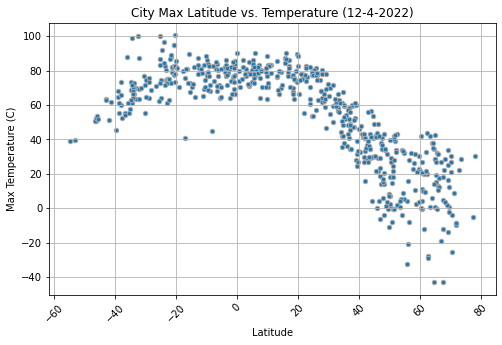

In [32]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot('Lat', 'Max Temp', kind='scatter', figsize= (8,5), rot=45, edgecolor='darkgray')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

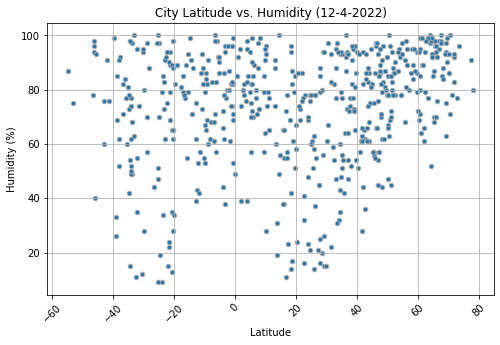

In [33]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot('Lat', 'Humidity', kind='scatter', figsize= (8,5), rot=45, edgecolor='darkgray')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

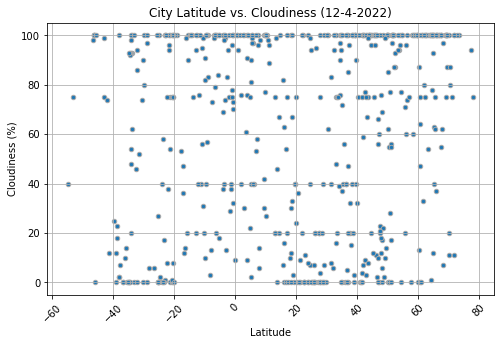

In [34]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot('Lat', 'Cloudiness', kind='scatter', figsize= (8,5), rot=45, edgecolor='darkgray')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

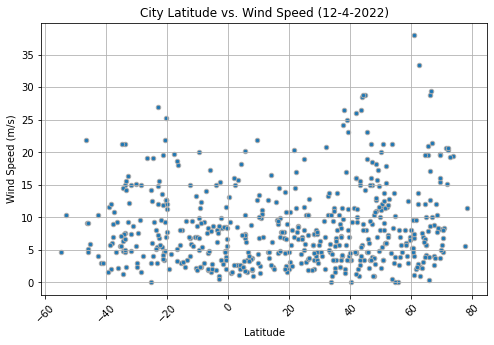

In [35]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot('Lat', 'Wind Speed', kind='scatter', figsize= (8,5), rot=45, edgecolor='darkgray')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


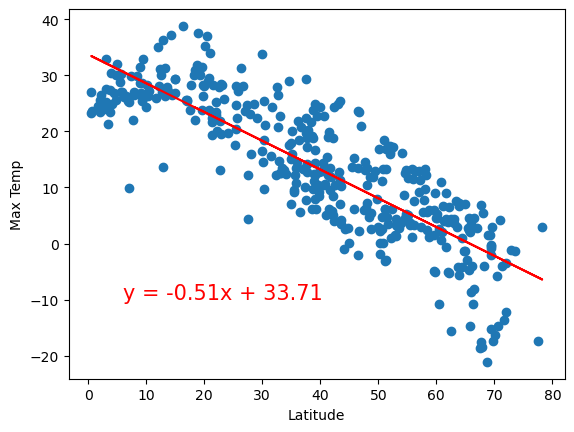

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


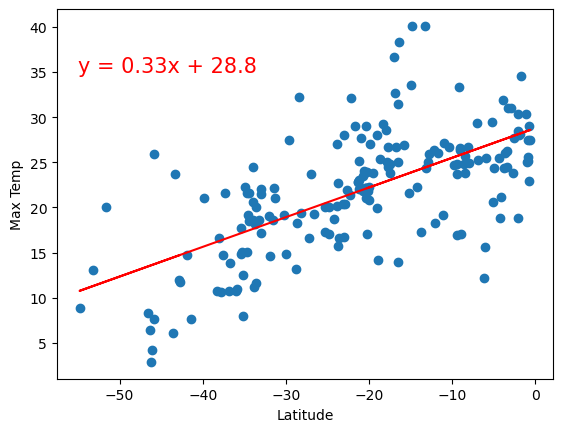

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


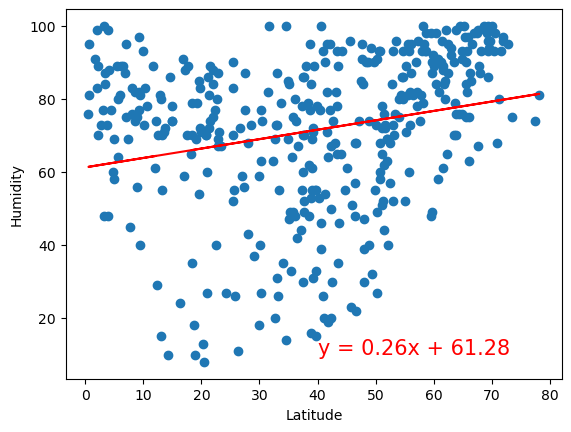

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


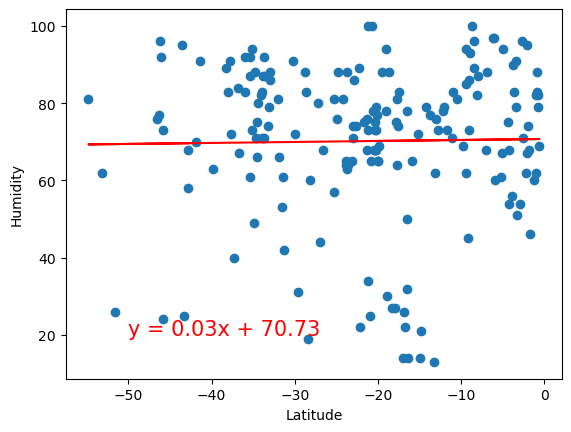

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


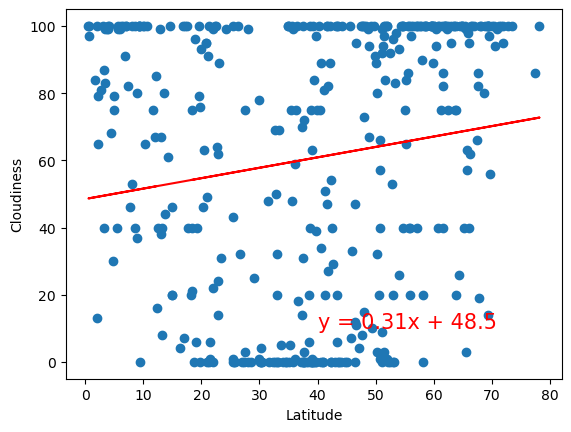

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


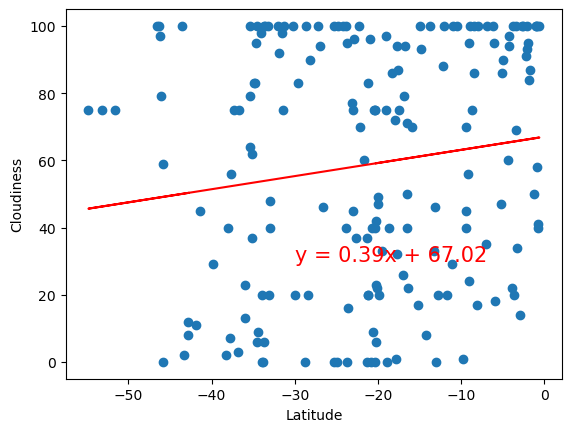

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


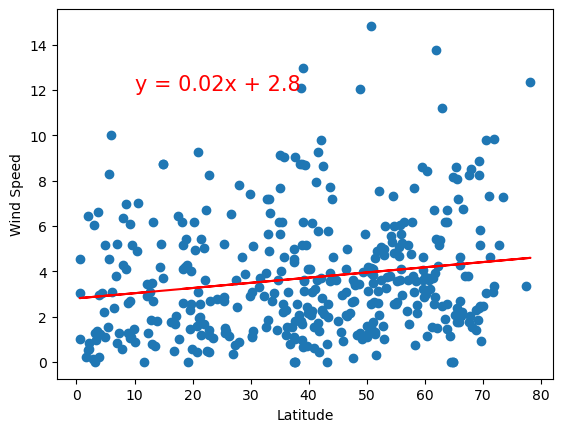

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


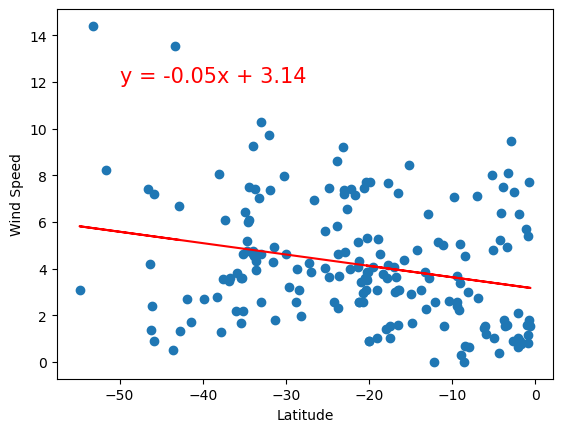

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE